In [1]:
import os
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

import src.io as sio
import src.preprocessing as spp
import src.fitting as sft

In [2]:
DATA_FOLDER = "20211124_Laser_Testing"
DATA_FOLDERPATH = sio.get_qudiamond_folderpath(DATA_FOLDER)
FIGURE_FOLDERPATH = sio.get_figure_folderpath(DATA_FOLDER)

In [3]:
def pct_change(arr):
    return (np.max(arr) - np.min(arr)) / np.mean(arr) * 100

src.io :: INFO :: Saving 'at_objective_powermeter_comparison' to 'Z:/Data_Analysis\20211124_Laser_Testing'


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
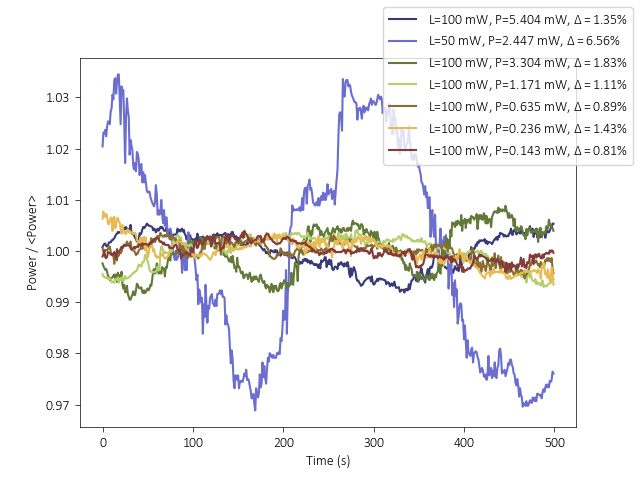

In [5]:
%matplotlib widget
fig, ax = plt.subplots()

colors = plt.cm.tab20b(np.linspace(0, 1, 11))

idx = 0
for folder in os.listdir(DATA_FOLDERPATH):
    if "objective" in folder:
        for filename in os.listdir(os.path.join(DATA_FOLDERPATH, folder)):
            if filename.endswith(".txt") and "powermeter" in filename:
                laser_power = re.findall(r'\d+', filename)[-1]
                powers = np.genfromtxt(os.path.join(DATA_FOLDERPATH, folder, filename))
                ax.plot(powers / np.mean(powers), label="L={} mW, P={:.3f} mW, $\Delta=${:.2f}%".format(laser_power, np.mean(powers)*1e3, pct_change(powers)), color=colors[idx])
                idx += 1
ax.set_ylabel("Power / <Power>")
ax.set_xlabel("Time (s)")

fig.legend()
sio.save_figures(filename="at_objective_powermeter_comparison", folder=FIGURE_FOLDERPATH)